In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import numpy as np

1. Connecting to a database

In [2]:
username = 'root'
password = '123456789'
host = 'localhost'
database = 'chinook'

engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

tables = ['album', 'artist', 'customer', 'employee', 'genre', 
          'invoice', 'invoiceline', 'mediatype', 'playlist', 
          'playlisttrack', 'track']

dataframes = {}
for table in tables:
    dataframes[table] = pd.read_sql_table(table, engine)



Loading DataFrames

In [3]:
album_df = pd.read_sql_table('album', engine)
artist_df = pd.read_sql_table('artist', engine)
customer_df = pd.read_sql_table('customer', engine)
employee_df = pd.read_sql_table('employee', engine)
genre_df = pd.read_sql_table('genre', engine)
invoice_df = pd.read_sql_table('invoice', engine)
invoiceline_df = pd.read_sql_table('invoiceline', engine)
mediatype_df = pd.read_sql_table('mediatype', engine)
playlist_df = pd.read_sql_table('playlist', engine)
playlisttrack_df = pd.read_sql_table('playlisttrack', engine)
track_df = pd.read_sql_table('track', engine)

2.1 ) Basic review of the album table

In [15]:
album_df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [22]:
album_df.tail()

,AlbumId,Title,ArtistId
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274
346,347,Koyaanisqatsi (Soundtrack from the Motion Pict...,275


In [19]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


In [20]:
album_df.describe(include='all')

,AlbumId,Title,ArtistId
count,347.000000,347,347.000000
unique,NaN,347,NaN
top,NaN,For Those About To Rock We Salute You,NaN
freq,NaN,1,NaN
mean,174.000000,NaN,121.942363
std,100.314505,NaN,77.793131
min,1.000000,NaN,1.000000
25%,87.500000,NaN,58.000000
50%,174.000000,NaN,112.000000
75%,260.500000,NaN,179.500000


In [21]:
album_df.isnull().sum()

AlbumId     0
Title       0
ArtistId    0
dtype: int64

2.2 ) Basic review of the artist table

In [25]:
artist_df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [29]:
artist_df.tail()

,ArtistId,Name
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble
274,275,Philip Glass Ensemble


In [26]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [27]:
artist_df.describe(include='all')

,ArtistId,Name
count,275.000000,275
unique,NaN,275
top,NaN,AC/DC
freq,NaN,1
mean,138.000000,NaN
std,79.529869,NaN
min,1.000000,NaN
25%,69.500000,NaN
50%,138.000000,NaN
75%,206.500000,NaN


In [28]:
artist_df.isnull().sum()

ArtistId    0
Name        0
dtype: int64

2.3 ) Basic review of the customer table

In [31]:
customer_df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [32]:
customer_df.tail()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
54,55,Mark,Taylor,None,421 Bourke Street,Sidney,NSW,Australia,2010,+61 (02) 9332 3633,None,mark.taylor@yahoo.au,4
55,56,Diego,Gutiérrez,None,307 Macacha Güemes,Buenos Aires,None,Argentina,1106,+54 (0)11 4311 4333,None,diego.gutierrez@yahoo.ar,4
56,57,Luis,Rojas,None,"Calle Lira, 198",Santiago,None,Chile,None,+56 (0)2 635 4444,None,luisrojas@yahoo.cl,5
57,58,Manoj,Pareek,None,"12,Community Centre",Delhi,None,India,110017,+91 0124 39883988,None,manoj.pareek@rediff.com,3
58,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,None,puja_srivastava@yahoo.in,3


In [33]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [34]:
customer_df.describe(include='all')

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
count,59.000000,59,59,10,59,59,30,59,55,58,12,59,59.000000
unique,NaN,57,59,10,59,53,25,24,55,58,12,59,NaN
top,NaN,Frank,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",Prague,SP,USA,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,NaN
freq,NaN,2,1,1,1,2,3,13,1,1,1,1,NaN
mean,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.949153
std,17.175564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818403
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,44.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [35]:
customer_df.isnull().sum()

CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64

2.4 ) Basic review of the employee table

In [42]:
employee_df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [49]:
employee_df.tail()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01,2003-10-17,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29,2004-01-02,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09,2004-03-04,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [43]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EmployeeId  8 non-null      int64         
 1   LastName    8 non-null      object        
 2   FirstName   8 non-null      object        
 3   Title       8 non-null      object        
 4   ReportsTo   7 non-null      float64       
 5   BirthDate   8 non-null      datetime64[ns]
 6   HireDate    8 non-null      datetime64[ns]
 7   Address     8 non-null      object        
 8   City        8 non-null      object        
 9   State       8 non-null      object        
 10  Country     8 non-null      object        
 11  PostalCode  8 non-null      object        
 12  Phone       8 non-null      object        
 13  Fax         8 non-null      object        
 14  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 1.1+ KB


In [44]:
employee_df.describe(include='all')

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
count,8.00000,8,8,8,7.000000,8,8,8,8,8,8,8,8,8,8
unique,NaN,8,8,5,NaN,NaN,NaN,8,3,1,1,8,7,8,8
top,NaN,Adams,Andrew,Sales Support Agent,NaN,NaN,NaN,11120 Jasper Ave NW,Calgary,AB,Canada,T5K 2N1,+1 (403) 262-3443,+1 (780) 428-3457,andrew@chinookcorp.com
freq,NaN,1,1,3,NaN,NaN,NaN,1,5,8,8,1,2,1,1
mean,4.50000,NaN,NaN,NaN,2.857143,1964-12-10 03:00:00,2003-04-15 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,1.000000,1947-09-19 00:00:00,2002-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.75000,NaN,NaN,NaN,1.500000,1961-05-02 00:00:00,2002-07-18 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.50000,NaN,NaN,NaN,2.000000,1966-08-06 00:00:00,2003-07-25 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.25000,NaN,NaN,NaN,4.000000,1971-03-07 06:00:00,2003-11-05 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.00000,NaN,NaN,NaN,6.000000,1973-08-29 00:00:00,2004-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
employee_df.isnull().sum()

EmployeeId    0
LastName      0
FirstName     0
Title         0
ReportsTo     1
BirthDate     0
HireDate      0
Address       0
City          0
State         0
Country       0
PostalCode    0
Phone         0
Fax           0
Email         0
dtype: int64

2.5 ) Basic review of the genre table

In [46]:
genre_df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [50]:
genre_df.tail()

,GenreId,Name
20,21,Drama
21,22,Comedy
22,23,Alternative
23,24,Classical
24,25,Opera


In [51]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GenreId  25 non-null     int64 
 1   Name     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


In [52]:
genre_df.describe(include='all')

,GenreId,Name
count,25.000000,25
unique,NaN,25
top,NaN,Rock
freq,NaN,1
mean,13.000000,NaN
std,7.359801,NaN
min,1.000000,NaN
25%,7.000000,NaN
50%,13.000000,NaN
75%,19.000000,NaN


In [53]:
genre_df.isnull().sum()

GenreId    0
Name       0
dtype: int64

2.6 ) Basic review of the invoice table

In [54]:
invoice_df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2021-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2021-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2021-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2021-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2021-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [55]:
invoice_df.tail()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
407,408,25,2025-12-05,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2025-12-06,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2025-12-09,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2025-12-14,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86
411,412,58,2025-12-22,"12,Community Centre",Delhi,None,India,110017,1.99


In [56]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [57]:
invoice_df.describe(include='all')

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
count,412.000000,412.000000,412,412,412,210,412,384,412.000000
unique,NaN,NaN,NaN,59,53,25,24,55,NaN
top,NaN,NaN,NaN,Theodor-Heuss-Straße 34,Prague,CA,USA,70174,NaN
freq,NaN,NaN,NaN,7,14,21,91,7,NaN
mean,206.500000,29.929612,2023-06-26 08:05:49.514563072,NaN,NaN,NaN,NaN,NaN,5.651942
min,1.000000,1.000000,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.990000
25%,103.750000,15.000000,2022-03-27 00:00:00,NaN,NaN,NaN,NaN,NaN,1.980000
50%,206.500000,30.000000,2023-06-22 12:00:00,NaN,NaN,NaN,NaN,NaN,3.960000
75%,309.250000,45.000000,2024-09-26 06:00:00,NaN,NaN,NaN,NaN,NaN,8.910000
max,412.000000,59.000000,2025-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,25.860000


In [58]:
invoice_df.isnull().sum()

InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity            0
BillingState         202
BillingCountry         0
BillingPostalCode     28
Total                  0
dtype: int64

2.7 ) Basic review of the invoiceline table

In [17]:
invoiceline_df.head()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


In [18]:
invoiceline_df.tail()

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1
2239,2240,412,3177,1.99,1


In [19]:
invoiceline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceLineId  2240 non-null   int64  
 1   InvoiceId      2240 non-null   int64  
 2   TrackId        2240 non-null   int64  
 3   UnitPrice      2240 non-null   float64
 4   Quantity       2240 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 87.6 KB


In [20]:
invoiceline_df.describe(include='all')

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
mean,1120.500000,206.868750,1717.734375,1.039554,1.0
std,646.776623,119.134877,993.797999,0.217069,0.0
min,1.000000,1.000000,1.000000,0.990000,1.0
25%,560.750000,103.000000,874.000000,0.990000,1.0
50%,1120.500000,207.000000,1708.000000,0.990000,1.0
75%,1680.250000,311.000000,2560.000000,0.990000,1.0
max,2240.000000,412.000000,3500.000000,1.990000,1.0


In [21]:
invoiceline_df.isnull().sum()

InvoiceLineId    0
InvoiceId        0
TrackId          0
UnitPrice        0
Quantity         0
dtype: int64

2.8 ) Basic review of the mediatype table

In [39]:
mediatype_df.head()

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [43]:
mediatype_df.tail()

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


2.9 ) Basic review of the playlist table

In [44]:
playlist_df.head()

,PlaylistId,Name
0,1,Music
1,2,Movies
2,3,TV Shows
3,4,Audiobooks
4,5,90’s Music


In [45]:
playlist_df.tail()

,PlaylistId,Name
13,14,Classical 101 - Next Steps
14,15,Classical 101 - The Basics
15,16,Grunge
16,17,Heavy Metal Classic
17,18,On-The-Go 1


In [46]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlaylistId  18 non-null     int64 
 1   Name        18 non-null     object
dtypes: int64(1), object(1)
memory usage: 420.0+ bytes


In [47]:
playlist_df.describe(include='all')

,PlaylistId,Name
count,18.000000,18
unique,NaN,14
top,NaN,Music
freq,NaN,2
mean,9.500000,NaN
std,5.338539,NaN
min,1.000000,NaN
25%,5.250000,NaN
50%,9.500000,NaN
75%,13.750000,NaN


In [48]:
playlist_df.isnull().sum()

PlaylistId    0
Name          0
dtype: int64

Top 5 artists with the highest total sales in their playlists, their album count, and playlist count

In [75]:

track_album_artist_df = pd.merge(track_df, album_df, on='AlbumId')
track_album_artist_df = pd.merge(track_album_artist_df, artist_df, on='ArtistId')

playlist_tracks_df = pd.merge(playlisttrack_df, track_album_artist_df, on='TrackId')
playlist_sales_df = pd.merge(playlist_tracks_df, invoiceline_df, on='TrackId')

playlist_total_sales = playlist_sales_df.groupby('PlaylistId')['UnitPrice_y'].sum().reset_index()

highest_sales_playlist_id = playlist_total_sales.loc[playlist_total_sales['UnitPrice_y'].idxmax(), 'PlaylistId']

top_playlist_tracks = playlist_tracks_df[playlist_tracks_df['PlaylistId'] == highest_sales_playlist_id]
top_playlist_artists = top_playlist_tracks[['ArtistId', 'Name_x']].drop_duplicates()

artist_sales = playlist_tracks_df.merge(invoiceline_df, on='TrackId')
artist_sales = artist_sales.groupby('ArtistId')['UnitPrice_y'].sum().reset_index()

artist_sales = artist_sales.merge(artist_df[['ArtistId', 'Name']], on='ArtistId', how='left')

album_count = track_album_artist_df.groupby('ArtistId')['AlbumId'].nunique().reset_index()
album_count.columns = ['ArtistId', 'AlbumCount']

playlist_count = playlist_tracks_df.groupby('ArtistId')['PlaylistId'].nunique().reset_index()
playlist_count.columns = ['ArtistId', 'PlaylistCount']

artist_sales = artist_sales.merge(album_count, on='ArtistId', how='left')
artist_sales = artist_sales.merge(playlist_count, on='ArtistId', how='left')

top_artists_sales = artist_sales.sort_values(by='UnitPrice_y', ascending=False).head(10)

print("Top 5 artists with the highest total sales in their playlists, their album count, and playlist count:")
print(top_artists_sales[['Name', 'UnitPrice_y', 'AlbumCount', 'PlaylistCount']])


Top 5 artists with the highest total sales in their playlists, their album count, and playlist count:
                        Name  UnitPrice_y  AlbumCount  PlaylistCount
58               Iron Maiden       333.63          21              4
114                       U2       258.39          10              3
30                 Metallica       236.61          10              4
21              Led Zeppelin       188.10          14              3
113                     Lost       163.18           4              2
49              Eric Clapton       118.80           2              4
50             Faith No More       117.81           4              3
80   Os Paralamas Do Sucesso       106.92           3              3
38               Deep Purple       105.93          11              3
110                    Titãs       100.98           2              3


2.10 ) Basic review of the playlisttrack table

In [79]:
playlisttrack_df.head(5)

,PlaylistId,TrackId
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [80]:
playlisttrack_df.tail()

,PlaylistId,TrackId
8710,17,2094
8711,17,2095
8712,17,2096
8713,17,3290
8714,18,597


In [81]:
playlisttrack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PlaylistId  8715 non-null   int64
 1   TrackId     8715 non-null   int64
dtypes: int64(2)
memory usage: 136.3 KB


In [83]:
playlisttrack_df.isnull().sum()

PlaylistId    0
TrackId       0
dtype: int64

2.11 ) Basic review of the track table

In [84]:
track_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [85]:
track_df.tail()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
3498,3499,Pini Di Roma (Pinien Von Rom) I Pini Della Vi...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99
3502,3503,Koyaanisqatsi,347,2,10,Philip Glass,206005,3305164,0.99


In [86]:
track_df.describe(include='all')

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
count,3503.000000,3503,3503.000000,3503.000000,3503.000000,2526,3.503000e+03,3.503000e+03,3503.000000
unique,NaN,3257,NaN,NaN,NaN,853,NaN,NaN,NaN
top,NaN,The Trooper,NaN,NaN,NaN,Steve Harris,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,80,NaN,NaN,NaN
mean,1752.000000,NaN,140.929489,1.208393,5.725378,NaN,3.935992e+05,3.351021e+07,1.050805
std,1011.373324,NaN,81.775395,0.580443,6.190204,NaN,5.350054e+05,1.053925e+08,0.239006
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.071000e+03,3.874700e+04,0.990000
25%,876.500000,NaN,70.500000,1.000000,1.000000,NaN,2.072810e+05,6.342566e+06,0.990000
50%,1752.000000,NaN,141.000000,1.000000,3.000000,NaN,2.556340e+05,8.107896e+06,0.990000
75%,2627.500000,NaN,212.000000,1.000000,7.000000,NaN,3.216450e+05,1.026679e+07,0.990000


In [87]:
track_df.isnull().sum()

TrackId           0
Name              0
AlbumId           0
MediaTypeId       0
GenreId           0
Composer        977
Milliseconds      0
Bytes             0
UnitPrice         0
dtype: int64

Composer with the most tracks

In [95]:
track_df = track_df.dropna(subset=['Composer'])

composer_track_count = track_df['Composer'].value_counts()

composer_track_count_df = pd.DataFrame(composer_track_count).reset_index()
composer_track_count_df.columns = ['Composer', 'TrackCount']

top_composer = composer_track_count_df.loc[composer_track_count_df['TrackCount'].idxmax()]

print("Composer with the most tracks:")
print(top_composer)


Composer with the most tracks:
Composer      Steve Harris
TrackCount              80
Name: 0, dtype: object


Composer with the longest track and its genre

In [100]:

track_df = track_df.dropna(subset=['Composer'])

track_genre_df = pd.merge(track_df, genre_df, on='GenreId')

max_duration_per_composer = track_genre_df.groupby('Composer')['Milliseconds'].max().reset_index()

longest_track_composer = max_duration_per_composer.loc[max_duration_per_composer['Milliseconds'].idxmax()]

longest_track_info = track_genre_df[
    (track_genre_df['Composer'] == longest_track_composer['Composer']) &
    (track_genre_df['Milliseconds'] == longest_track_composer['Milliseconds'])
]

longest_track_info = longest_track_info[['Composer', 'Milliseconds', 'Name_y']].drop_duplicates()

print("Composer with the longest track and its genre:")
print(longest_track_info)


Composer with the longest track and its genre:
        Composer  Milliseconds Name_y
1204  Jimmy Page       1612329   Rock


3.1 ) Number of Customers by Country

C:\Users\HP\AppData\Local\Temp\ipykernel_10204\3424595971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


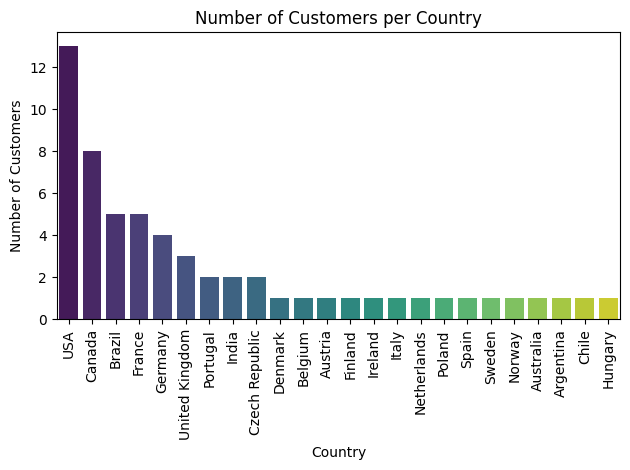

In [4]:
country_counts = customer_df['Country'].value_counts()

plt.figure()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Number of Customers per Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3.2 ) Monthly/yearly sales trend

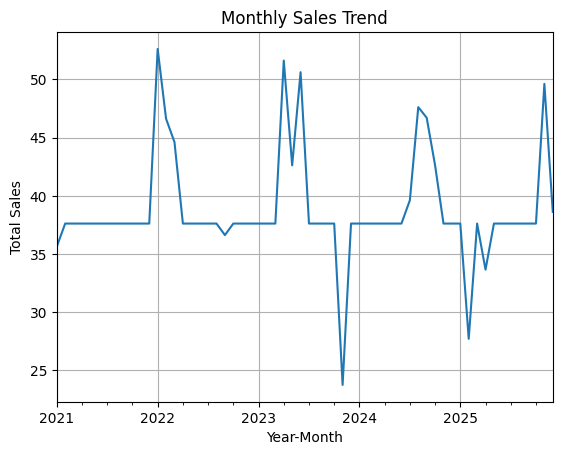

In [4]:
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

invoice_df['YearMonth'] = invoice_df['InvoiceDate'].dt.to_period('M')

monthly_sales = invoice_df.groupby('YearMonth')['Total'].sum()

plt.figure()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

3.3 ) Distribution of invoices

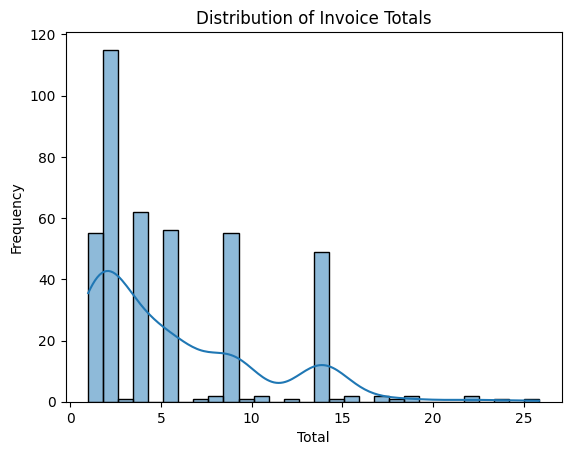

In [6]:
plt.figure()
sns.histplot(invoice_df['Total'], bins=30, kde=True)
plt.title('Distribution of Invoice Totals')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

3.4 ) Top 10 Most Sold Albums

C:\Users\HP\AppData\Local\Temp\ipykernel_7996\3271691876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_sales_count.index, y=album_sales_count.values, palette='viridis')


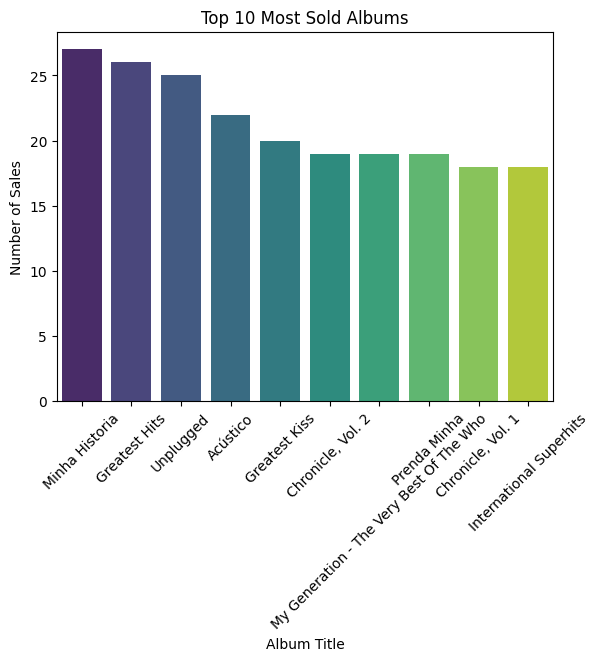

In [7]:
track_album_df = pd.merge(track_df, album_df, left_on='AlbumId', right_on='AlbumId')
track_invoice_df = pd.merge(invoiceline_df, track_album_df, left_on='TrackId', right_on='TrackId')

album_sales_count = track_invoice_df['Title'].value_counts().head(10)

plt.figure()
sns.barplot(x=album_sales_count.index, y=album_sales_count.values, palette='viridis')
plt.title('Top 10 Most Sold Albums')
plt.xlabel('Album Title')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

3.5 ) Distribution of Track duration based on minutes

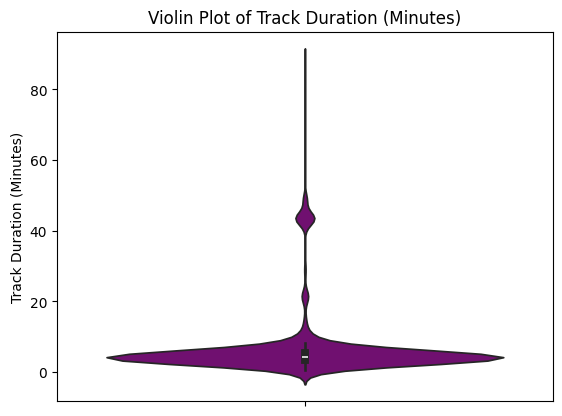

In [14]:
track_df['DurationMinutes'] = track_df['Milliseconds'] / (1000 * 60)

track_df = track_df.dropna(subset=['DurationMinutes'])

plt.figure() 
sns.violinplot(y=track_df['DurationMinutes'], color='purple')
plt.title('Violin Plot of Track Duration (Minutes)')
plt.ylabel('Track Duration (Minutes)')
plt.show()


3.6 ) Sales distribution by genre

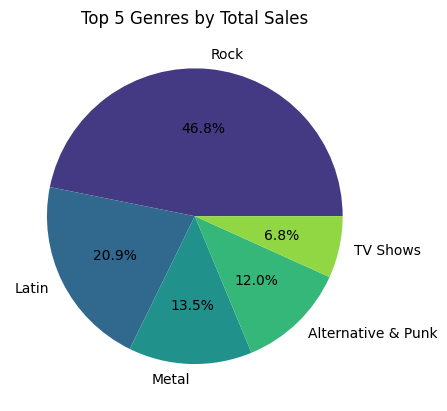

In [16]:
track_df = track_df.drop_duplicates()
genre_df = genre_df.drop_duplicates()
track_df = track_df.dropna(subset=['GenreId'])
genre_df = genre_df.dropna(subset=['GenreId'])

track_genre_df = pd.merge(track_df, genre_df, on='GenreId')
track_genre_df = track_genre_df.drop_duplicates()
track_genre_df.rename(columns={'Name_x': 'TrackName', 'Name_y': 'GenreName'}, inplace=True)

sales_sum = track_genre_df.groupby('GenreName')['UnitPrice'].sum().reset_index()
sales_sum = sales_sum.sort_values(by='UnitPrice', ascending=False)

top_5_genres = sales_sum.head(5)

plt.figure()
plt.pie(top_5_genres['UnitPrice'], labels=top_5_genres['GenreName'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_5_genres)))
plt.title('Top 5 Genres by Total Sales')
plt.show()


3.7 ) Distribution of Number of Tracks per Album

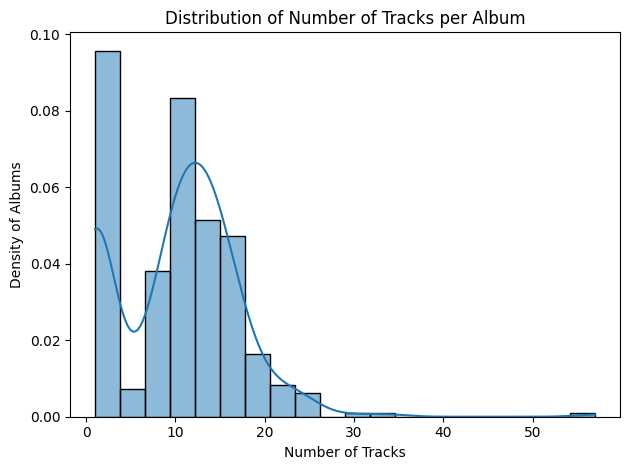

In [17]:
tracks_per_album = track_df.groupby('AlbumId').size()

plt.figure()

sns.histplot(tracks_per_album, bins=20, kde=True, stat="density")

plt.title('Distribution of Number of Tracks per Album')
plt.xlabel('Number of Tracks')
plt.ylabel('Density of Albums')
plt.tight_layout()
plt.show()

3.8 ) Relationship Between Number of Tracks and Total Sales for Composers

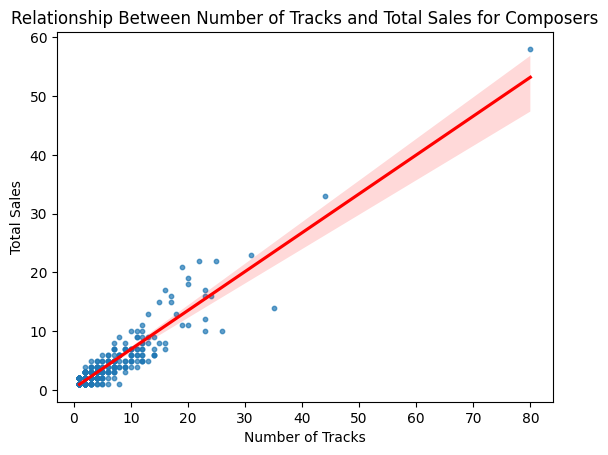

In [18]:
track_df = track_df.drop_duplicates()
track_df = track_df.dropna(subset=['Composer', 'TrackId'])

composer_track_count = track_df.groupby('Composer')['TrackId'].count().reset_index()
composer_track_count.columns = ['Composer', 'TrackCount']

track_sales = track_df.merge(invoiceline_df, on='TrackId')
composer_sales = track_sales.groupby('Composer')['Quantity'].sum().reset_index()
composer_sales.columns = ['Composer', 'TotalSales']

composer_summary = pd.merge(composer_track_count, composer_sales, on='Composer')

plt.figure()
sns.regplot(data=composer_summary, x='TrackCount', y='TotalSales', scatter_kws={'alpha':0.7, 's':10}, line_kws={'color':'red'})
plt.title('Relationship Between Number of Tracks and Total Sales for Composers')
plt.xlabel('Number of Tracks')
plt.ylabel('Total Sales')
plt.show()



3.9 ) Number of Invoices Issued by Sales Representatives in Each Country

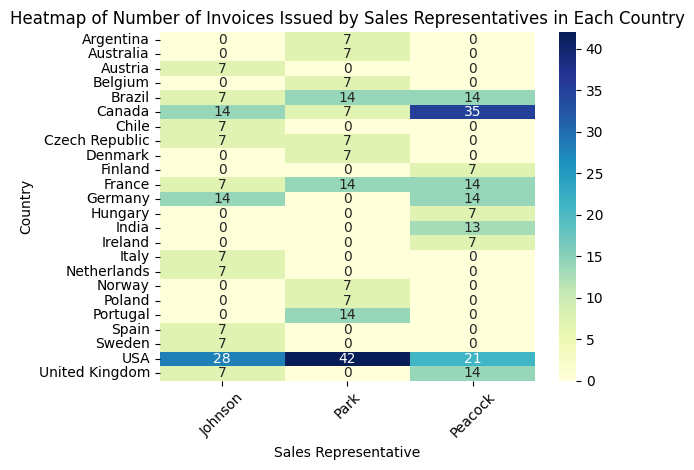

In [23]:
invoices_with_customers = pd.merge(invoice_df, customer_df, on='CustomerId')
invoices_with_sales_reps = pd.merge(invoices_with_customers, employee_df, left_on='SupportRepId', right_on='EmployeeId')

customer_country_col = 'Country_x'  
employee_lastname_col = 'LastName_y'  
sales_rep_country_matrix = invoices_with_sales_reps.pivot_table(
    index=customer_country_col,  
    columns=employee_lastname_col,  
    values='InvoiceId',          
    aggfunc='count'
).fillna(0)

plt.figure()
sns.heatmap(sales_rep_country_matrix, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Heatmap of Number of Invoices Issued by Sales Representatives in Each Country')
plt.xlabel('Sales Representative')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

5 )  Checking the normalization of numerical variables

5.1 ) Milliseconds variable

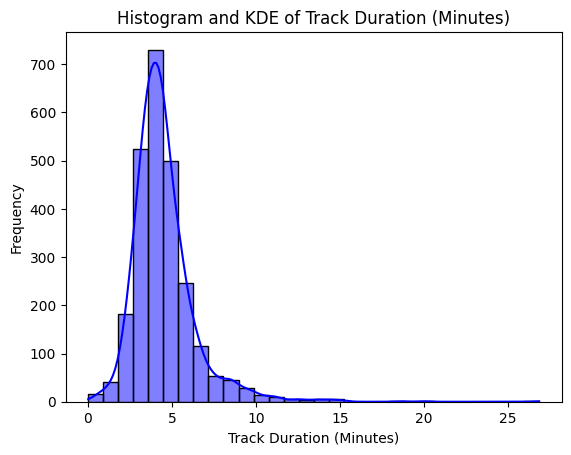

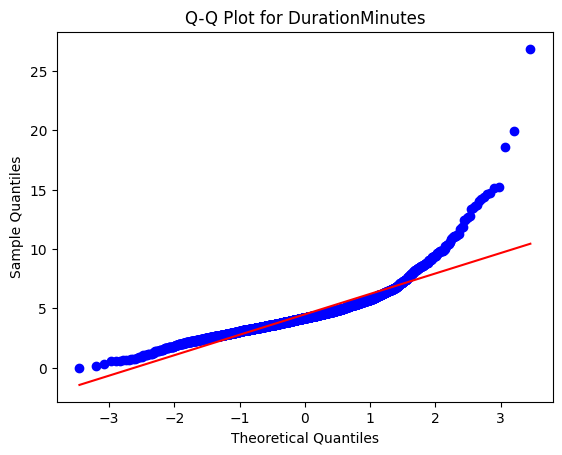

Shapiro-Wilk Test:
Statistic: 0.8409510006457531, p-value: 9.631709431155834e-45
Data is not normally distributed


In [75]:
#Histogram and KDE of Track Duration (Minutes)

track_df['DurationMinutes'] = track_df['Milliseconds'] / (1000 * 60)

track_df = track_df.drop_duplicates()
track_df = track_df.dropna(subset=['DurationMinutes'])

plt.figure()
sns.histplot(track_df['DurationMinutes'], kde=True, color='blue', bins=30)
plt.title('Histogram and KDE of Track Duration (Minutes)')
plt.xlabel('Track Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


#Q-Q Plot of Track Duration (Minutes)
numeric_column = 'DurationMinutes'

plt.figure()
stats.probplot(track_df[numeric_column], dist="norm", plot=plt,)
plt.title('Q-Q Plot for DurationMinutes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


#Shapiro-Wilk Test
numeric_column = 'DurationMinutes'

stat, p_value = shapiro(track_df[numeric_column])
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

5.2 ) Bytes variable

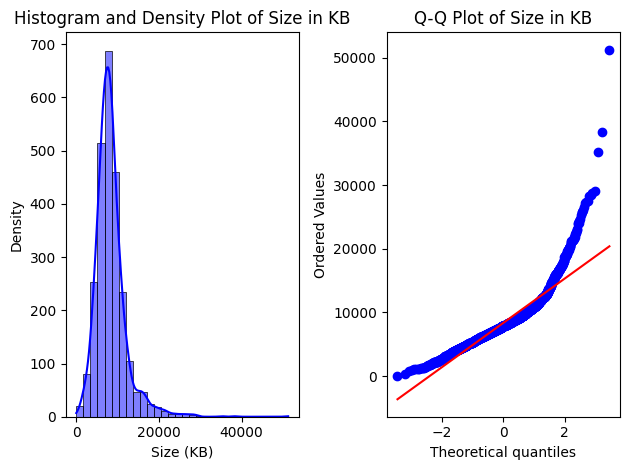

Kolmogorov-Smirnov Test statistic for Size in KB: 0.11906906500264491, p-value: 1.1596137882963554e-31
Data is not normally distributed according to Kolmogorov-Smirnov Test


In [83]:
#Histogram and Density Plot of Size in KB

bytes_data = track_df['Bytes']
kb_data = bytes_data / 1024  

plt.figure()
plt.subplot(1, 2, 1)
sns.histplot(kb_data, kde=True, color='blue', bins=30)
plt.title('Histogram and Density Plot of Size in KB')
plt.xlabel('Size (KB)')
plt.ylabel('Density')


#Q-Q Plot of Size in KB
plt.subplot(1, 2, 2)
stats.probplot(kb_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Size in KB')
plt.tight_layout()
plt.show()

#Kolmogorov-Smirnov Test statistic for Size in KB
mean_kb = kb_data.mean()
std_kb = kb_data.std()
stat_ks, p_value_ks = stats.kstest((kb_data - mean_kb) / std_kb, 'norm')
print(f'Kolmogorov-Smirnov Test statistic for Size in KB: {stat_ks}, p-value: {p_value_ks}')
if p_value_ks > 0.05:
    print('Data is normally distributed according to Kolmogorov-Smirnov Test')
else:
    print('Data is not normally distributed according to Kolmogorov-Smirnov Test')

5.3 ) Total variable

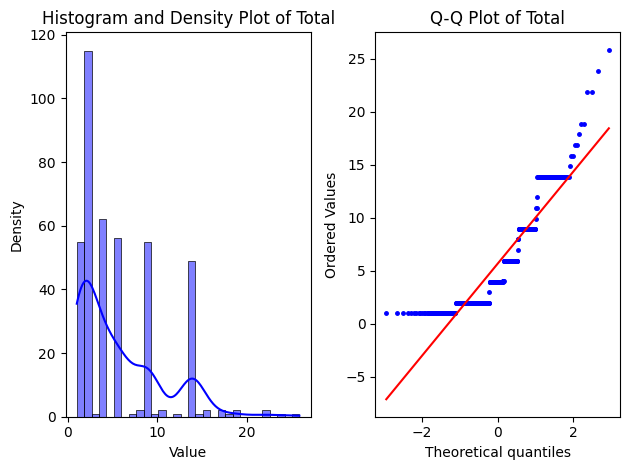

Kolmogorov-Smirnov Test statistic: 0.2032404223670663, p-value: 2.1324912710029327e-15
Data is not normally distributed (reject H0)


In [95]:
#Histogram and Density Plot of Total
total = invoice_df['Total']

plt.figure()
plt.subplot(1, 2, 1)
sns.histplot(total, kde=True, color='blue', bins=30)
plt.title('Histogram and Density Plot of Total')
plt.xlabel('Value')
plt.ylabel('Density')


#Q-Q Plot of Total
plt.subplot(1, 2, 2)
stats.probplot(total, dist="norm", plot=plt)
plt.title('Q-Q Plot of Total')

plt.gca().get_lines()[0].set_marker('.')
plt.gca().get_lines()[0].set_markersize(5)

plt.tight_layout()
plt.show()


#Kolmogorov-Smirnov Test statistic
mean = total.mean()
std = total.std()
stat_ks, p_value_ks = stats.kstest((total - mean) / std, 'norm')

print(f'Kolmogorov-Smirnov Test statistic: {stat_ks}, p-value: {p_value_ks}')

alpha = 0.05
if p_value_ks > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed (reject H0)')

5.4 ) UnitPrice variable

In [92]:
#Shapiro-Wilk Test statistic for UnitPrice

unit_price = invoiceline_df['UnitPrice']
stat_shapiro, p_value_shapiro = stats.shapiro(unit_price)
print(f'Shapiro-Wilk Test statistic for UnitPrice: {stat_shapiro}, p-value: {p_value_shapiro}')
if p_value_shapiro > 0.05:
    print('Shapiro-Wilk Test: Data is normally distributed (p-value > 0.05)')
else:
    print('Shapiro-Wilk Test: Data is not normally distributed (p-value <= 0.05)')
    
print('*' * 100)
    
# Kolmogorov-Smirnov Test statistic for UnitPrice
mean_unit_price = unit_price.mean()
std_unit_price = unit_price.std()
stat_ks, p_value_ks = stats.kstest((unit_price - mean_unit_price) / std_unit_price, 'norm')
print(f'Kolmogorov-Smirnov Test statistic for UnitPrice: {stat_ks}, p-value: {p_value_ks}')
if p_value_ks > 0.05:
    print('Kolmogorov-Smirnov Test: Data is normally distributed (p-value > 0.05)')
else:
    print('Kolmogorov-Smirnov Test: Data is not normally distributed (p-value <= 0.05)')
    
print('*' * 100)   

# Skewness for UnitPrice and Kurtosis for UnitPrice
skewness = stats.skew(unit_price)
kurtosis = stats.kurtosis(unit_price)
print(f'Skewness for UnitPrice: {skewness}')
print(f'Kurtosis for UnitPrice: {kurtosis}')

Shapiro-Wilk Test statistic for UnitPrice: 0.22256856261663105, p-value: 2.1025064392269568e-70
Shapiro-Wilk Test: Data is not normally distributed (p-value <= 0.05)
****************************************************************************************************
Kolmogorov-Smirnov Test statistic for UnitPrice: 0.5407339471947051, p-value: 0.0
Kolmogorov-Smirnov Test: Data is not normally distributed (p-value <= 0.05)
****************************************************************************************************
Skewness for UnitPrice: 4.151182642786681
Kurtosis for UnitPrice: 15.232317333773413


6 ) Outlier analysis

6.1 ) Identification of Total outliers

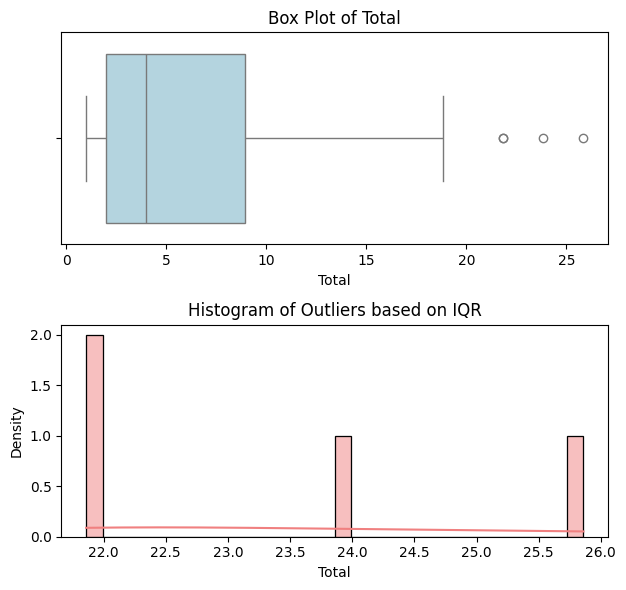

Number of outliers based on IQR: 4
Outliers based on IQR:
95     21.86
193    21.86
298    23.86
403    25.86
Name: Total, dtype: float64


In [8]:
#(Box Plot)
total = invoice_df['Total']
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=total, color='lightblue')
plt.title('Box Plot of Total')
plt.xlabel('Total')



#IQR (Interquartile Range)
Q1 = total.quantile(0.25)
Q3 = total.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = total[(total < lower_bound) | (total > upper_bound)]

plt.subplot(2, 2, 3)
sns.histplot(total[(total < lower_bound) | (total > upper_bound)], kde=True, color='lightcoral', bins=30)
plt.title('Histogram of Outliers based on IQR')
plt.xlabel('Total')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


print(f'Number of outliers based on IQR: {len(outliers_iqr)}')
print('Outliers based on IQR:')
print(outliers_iqr)

6.2 ) Identification of Bytes outliers

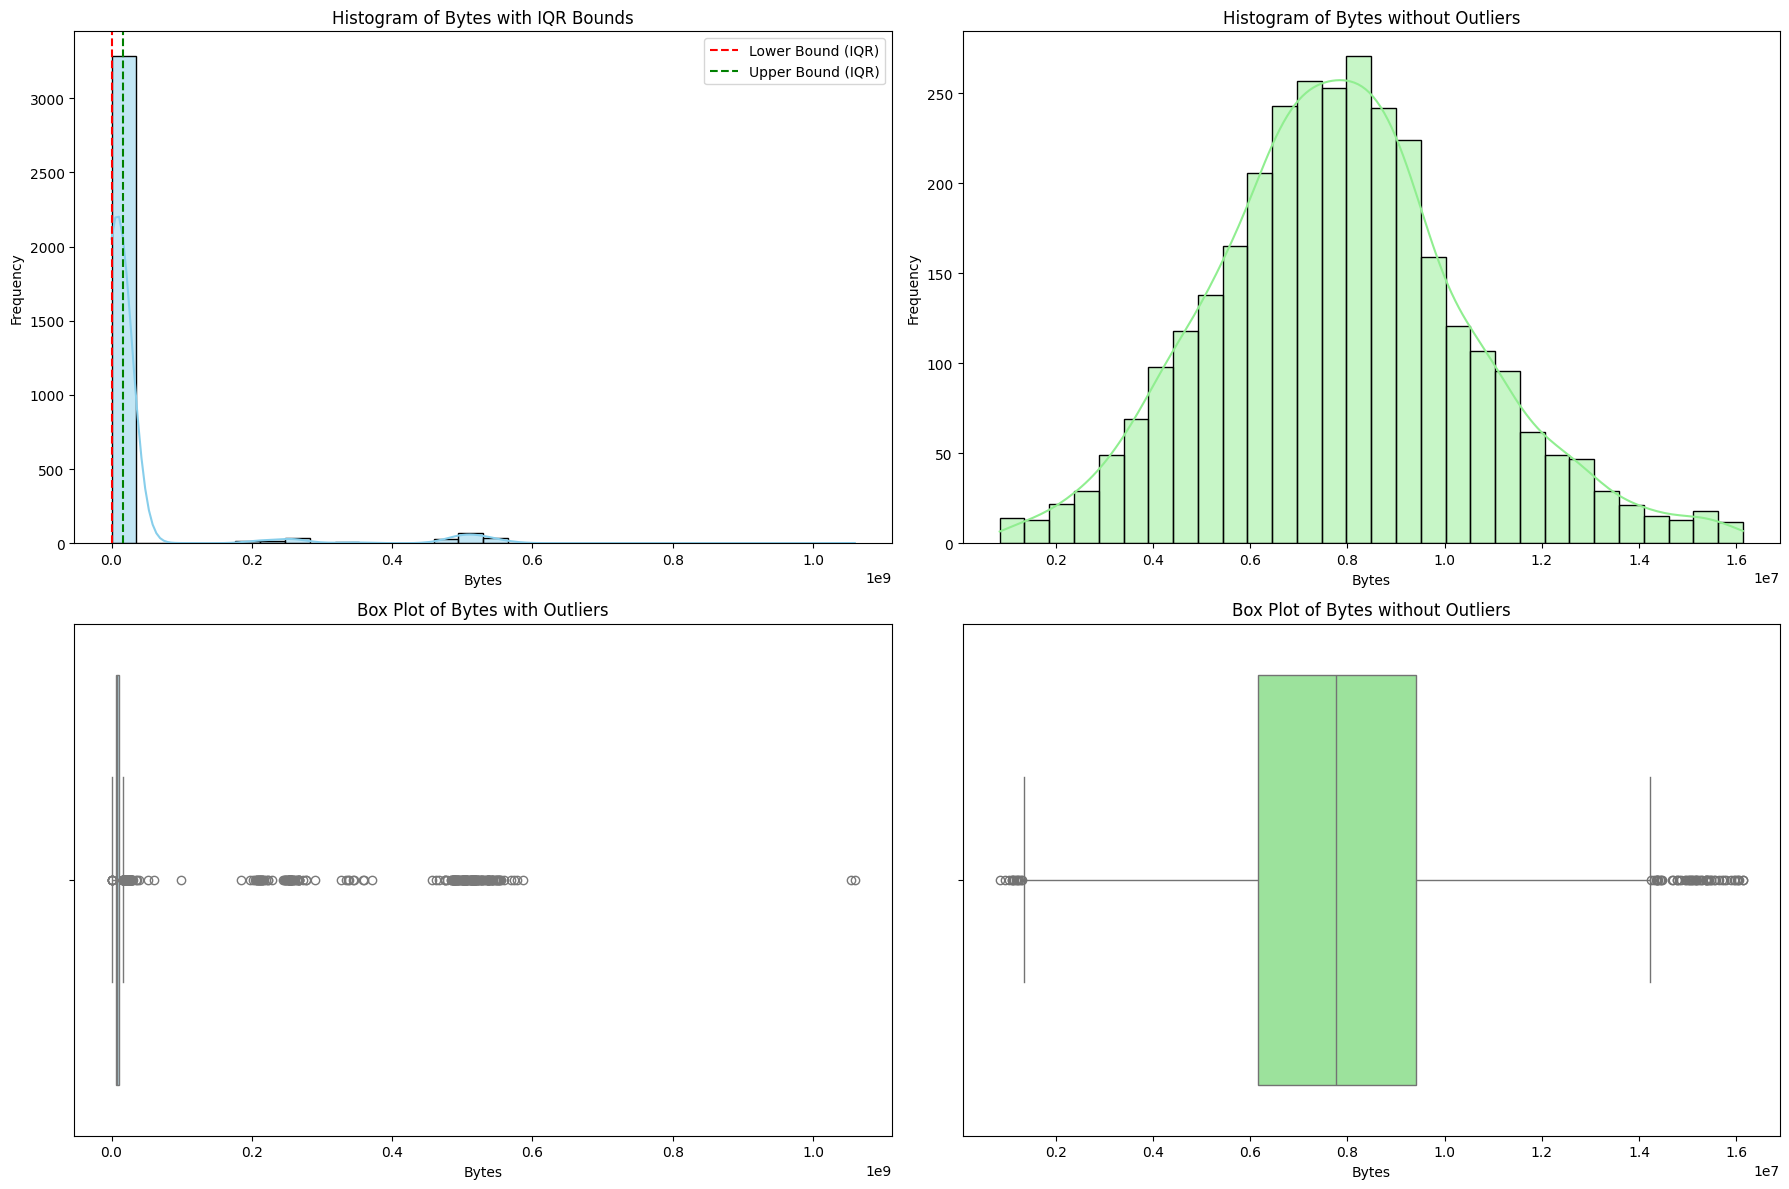

Number of outliers based on IQR: 343


In [33]:
# IQR (Interquartile Range) calculation
bytes_data = track_df['Bytes']
Q1 = bytes_data.quantile(0.25)
Q3 = bytes_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_without_outliers = bytes_data[(bytes_data >= lower_bound) & (bytes_data <= upper_bound)]

plt.figure(figsize=(18, 12))

# Distribution with outlier data
plt.subplot(2, 2, 1)
sns.histplot(bytes_data, kde=True, bins=30, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (IQR)')
plt.title('Histogram of Bytes with IQR Bounds')
plt.xlabel('Bytes')
plt.ylabel('Frequency')
plt.legend()

# Distribution without outliers
plt.subplot(2, 2, 2)
sns.histplot(data_without_outliers, kde=True, bins=30, color='lightgreen')
plt.title('Histogram of Bytes without Outliers')
plt.xlabel('Bytes')
plt.ylabel('Frequency')

# Draw a box plot with outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=bytes_data, color='lightblue')
plt.title('Box Plot of Bytes with Outliers')
plt.xlabel('Bytes')

# Draw a box plot without outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=data_without_outliers, color='lightgreen')
plt.title('Box Plot of Bytes without Outliers')
plt.xlabel('Bytes')

plt.tight_layout()
plt.show()

print(f'Number of outliers based on IQR: {len(bytes_data) - len(data_without_outliers)}')


6.3 ) Identification of milliseconds outliers

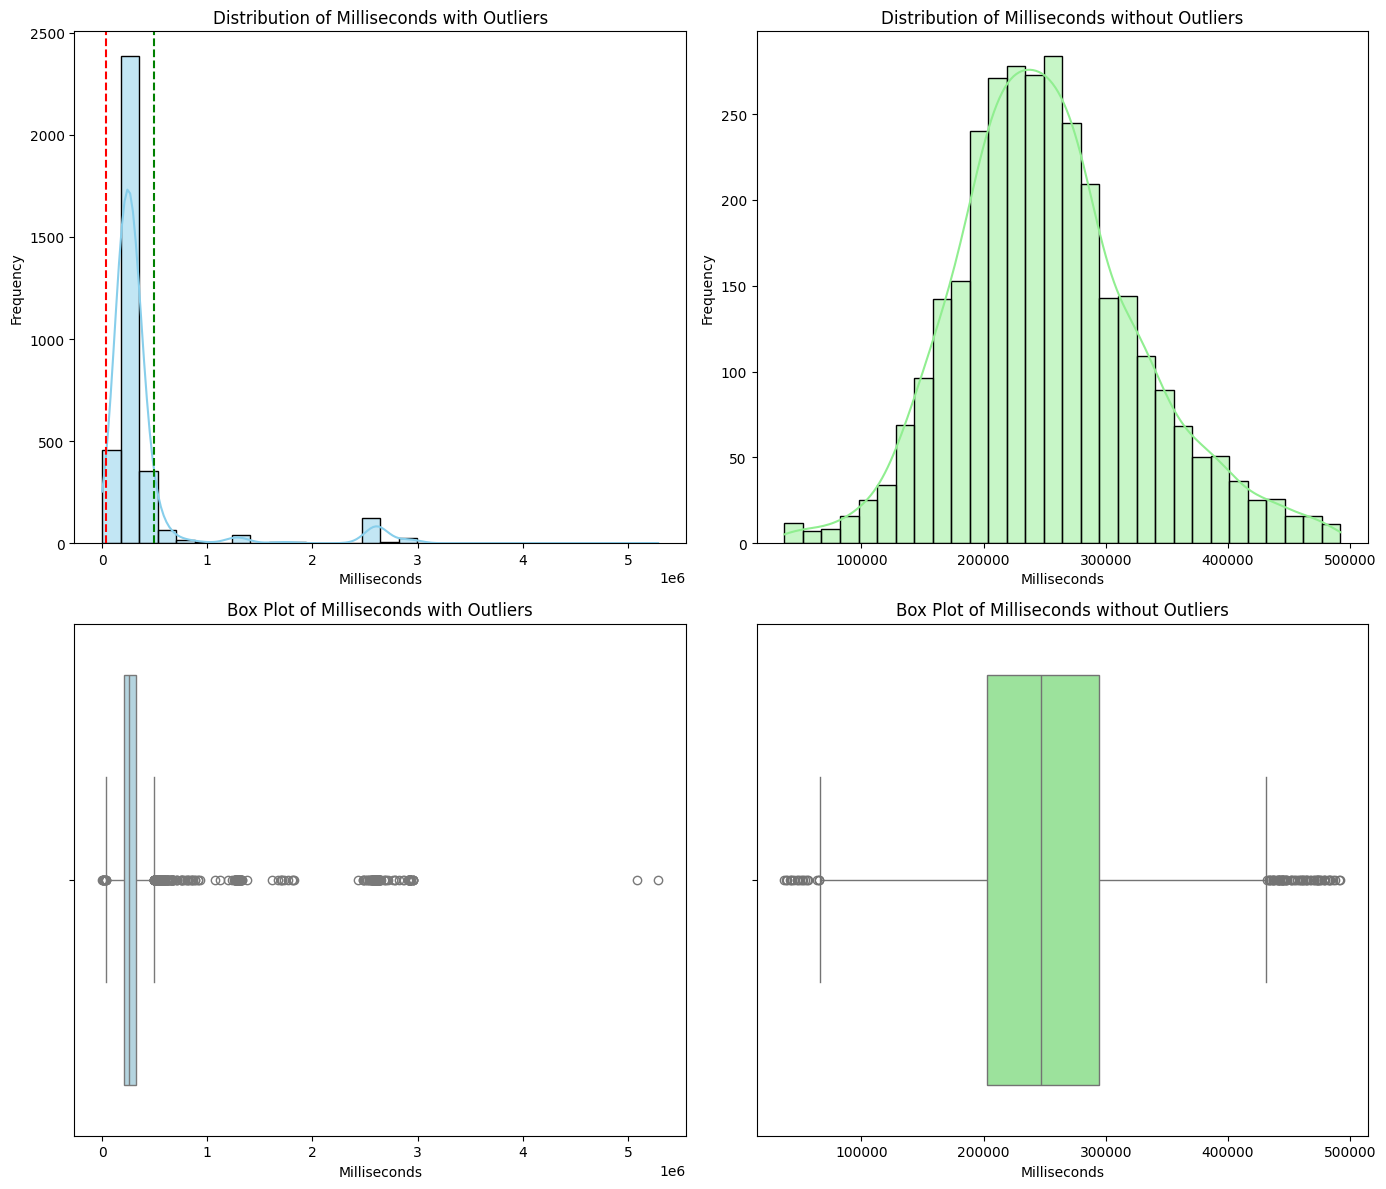

Number of outliers based on IQR: 357


In [31]:
# IQR (Interquartile Range) calculation
milliseconds_data = track_df['Milliseconds']
Q1 = milliseconds_data.quantile(0.25)
Q3 = milliseconds_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_without_outliers = milliseconds_data[(milliseconds_data >= lower_bound) & (milliseconds_data <= upper_bound)]

plt.figure(figsize=(14, 12))

# Distribution with outlier data
plt.subplot(2, 2, 1)
sns.histplot(milliseconds_data, kde=True, bins=30, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (IQR)')
plt.title('Histogram of Milliseconds with IQR Bounds')
plt.title('Distribution of Milliseconds with Outliers')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')


# Distribution without outliers
plt.subplot(2, 2, 2)
sns.histplot(data_without_outliers, kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Milliseconds without Outliers')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')


# Draw a box plot with outliers
plt.subplot(2, 2, 3)
sns.boxplot(x=milliseconds_data, color='lightblue')
plt.title('Box Plot of Milliseconds with Outliers')
plt.xlabel('Milliseconds')


# Draw a box plot without outliers
plt.subplot(2, 2, 4)
sns.boxplot(x=data_without_outliers, color='lightgreen')
plt.title('Box Plot of Milliseconds without Outliers')
plt.xlabel('Milliseconds')

plt.tight_layout()
plt.show()

print(f'Number of outliers based on IQR: {len(milliseconds_data) - len(data_without_outliers)}')


6.4 ) Identification of UnitPrice outliers

In [38]:
 #IQR (Interquartile Range)
unit_price = invoiceline_df['UnitPrice']
Q1 = unit_price.quantile(0.25)
Q3 = unit_price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = unit_price[(unit_price < lower_bound) | (unit_price > upper_bound)]
print(outliers_iqr)

467     1.99
468     1.99
469     1.99
470     1.99
471     1.99
        ... 
2196    1.99
2197    1.99
2198    1.99
2199    1.99
2239    1.99
Name: UnitPrice, Length: 111, dtype: float64


7.1 ) the three most popular genres and the price difference analysis between two distributions of this

In [4]:
merged_df = pd.merge(track_df, genre_df, on='GenreId', suffixes=('_track', '_genre'))
merged_invoice_df = pd.merge(invoiceline_df, merged_df, on='TrackId')


genre_counts = merged_invoice_df['Name_genre'].value_counts().nlargest(3)
top_genres = genre_counts.index.tolist()

print("Top 3 popular genres:", top_genres)

print('*' * 100)


top_genres_data = merged_invoice_df[merged_invoice_df['Name_genre'].isin(top_genres)]


mean_prices = top_genres_data.groupby('Name_genre')['UnitPrice_x'].mean()  
print("Mean prices for top 3 genres\n", mean_prices)

print('*' * 100)


genre1_prices = top_genres_data[top_genres_data['Name_genre'] == top_genres[0]]['UnitPrice_x']
genre2_prices = top_genres_data[top_genres_data['Name_genre'] == top_genres[1]]['UnitPrice_x']
genre3_prices = top_genres_data[top_genres_data['Name_genre'] == top_genres[2]]['UnitPrice_x']

# ANOVA
f_stat, p_value = stats.f_oneway(genre1_prices, genre2_prices, genre3_prices)
print(f"ANOVA result: F-statistic = {f_stat}, p-value = {p_value}")


alpha = 0.05
if p_value > alpha:
    print("The difference in mean prices between the top 3 genres is statistically significant.")
else:
    print("The difference in mean prices between the top 3 genres is not statistically significant.")

Top 3 popular genres: ['Rock', 'Latin', 'Metal']
****************************************************************************************************
Mean prices for top 3 genres
 Name_genre
Latin    0.99
Metal    0.99
Rock     0.99
Name: UnitPrice_x, dtype: float64
****************************************************************************************************
ANOVA result: F-statistic = nan, p-value = nan
The difference in mean prices between the top 3 genres is not statistically significant.


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


7.2 ) Existence of independence between song length and price

In [11]:
track_df['LengthInSeconds'] = track_df['Milliseconds'] / 1000
track_df.dropna(subset=['LengthInSeconds', 'UnitPrice'], inplace=True)


correlation, p_value = stats.pearsonr(track_df['LengthInSeconds'], track_df['UnitPrice'])

print("Pearson Correlation Coefficient:", correlation)
print("p-value:", p_value)

#pearsonr test
alpha = 0.05
if p_value > alpha:
    print("Reject the null hypothesis. There is a dependency between song length and price.")
else:
    print("Fail to reject the null hypothesis. There is no dependency between song length and price.")

Pearson Correlation Coefficient: 0.931796474911276
p-value: 0.0
Fail to reject the null hypothesis. There is no dependency between song length and price.


7.3 ) Genre Independence of the Song

In [7]:
track_genre_df = pd.merge(track_df, genre_df, on='GenreId', suffixes=('_track', '_genre'))
track_media_df = pd.merge(track_genre_df, mediatype_df, on='MediaTypeId')

genre_media_counts = track_media_df.groupby(['Name_genre', 'Name']).size().unstack(fill_value=0)


#Chi-square 
chi2_genre_media, p_genre_media, _ , _ = stats.chi2_contingency(genre_media_counts)

print(f"Chi-square test result for Genre and Media Type: chi2 = {chi2_genre_media}, p-value = {p_genre_media}")

alpha = 0.05
if p_genre_media > alpha:
    print("The relationship between Genre and Media Type is statistically significant.")
else:
    print("The relationship between Genre and Media Type is not statistically significant.")

Chi-square test result for Genre and Media Type: chi2 = 5650.180437321978, p-value = 0.0
The relationship between Genre and Media Type is not statistically significant.


7.4 ) Independence between the price of each track and the total sales for each artist

In [5]:
composer_track_count = track_df.groupby('Composer')['TrackId'].count().reset_index()
composer_track_count.columns = ['Composer', 'TrackCount']

track_sales = track_df.merge(invoiceline_df, on='TrackId')
composer_sales = track_sales.groupby('Composer')['Quantity'].sum().reset_index()
composer_sales.columns = ['Composer', 'TotalSales']

composer_summary = pd.merge(composer_track_count, composer_sales, on='Composer')

# Create buckets for track counts and total sales for Chi-square test
composer_summary['TrackCountBucket'] = pd.cut(composer_summary['TrackCount'], bins=range(0, composer_summary['TrackCount'].max() + 10, 10))
composer_summary['SalesBucket'] = pd.cut(composer_summary['TotalSales'], bins=range(0, composer_summary['TotalSales'].max() + 100, 100))

# Create contingency table for Chi-square analysis
contingency_table = pd.crosstab(composer_summary['TrackCountBucket'], composer_summary['SalesBucket'])

# Perform Chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test result for Track Count and Total Sales per Composer:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("The relationship between the number of tracks and total sales for each composer is statistically significant.")
else:
    print("The relationship between the number of tracks and total sales for each composer is not statistically significant.")

Chi-square test result for Track Count and Total Sales per Composer:
Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
The relationship between the number of tracks and total sales for each composer is not statistically significant.


7.5 ) Is the mean price of tracks significantly different across different groups of customers based on their country?

In [14]:
invoice_customer_df = pd.merge(invoice_df, customer_df, on='CustomerId')

invoice_details_df = pd.merge(invoice_customer_df, invoiceline_df, on='InvoiceId')

country_price_df = invoice_details_df[['Country', 'UnitPrice']]

grouped_country_price = country_price_df.groupby('Country')['UnitPrice'].apply(list)

#ANOVA test
f_stat, p_value = stats.f_oneway(*grouped_country_price)

print(f"ANOVA test result for UnitPrice across different countries:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("The mean price of tracks is significantly different across different countries.")
else:
    print("The mean price of tracks is not significantly different across different countries.")

ANOVA test result for UnitPrice across different countries:
F-statistic: 7.267448636027508
p-value: 7.294634201323816e-23
The mean price of tracks is not significantly different across different countries.


7.6 ) Are the track lengths significantly different across different albums?

In [16]:
merged_df = pd.merge(track_df, album_df, on='AlbumId')
merged_df['Seconds'] = merged_df['Milliseconds'] / 1000

albums = merged_df['Title'].unique()

# Prepare data for ANOVA
album_tracks = [merged_df[merged_df['Title'] == album]['Seconds'].values for album in albums]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*album_tracks)

print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("\nResult: There is a significant difference in track lengths between different albums.")
else:
    print("\nResult: There is no significant difference in track lengths between different albums.")

ANOVA Results:
F-Statistic: 181.54072347977
P-Value: 0.0

Result: There is no significant difference in track lengths between different albums.


7.7 ) Is the average price of tracks different across different years of release?

In [17]:
merged_df = pd.merge(invoiceline_df, invoice_df, on='InvoiceId')

#Extract the year from the InvoiceDate column and add it to the DataFrame
merged_df['Year'] = pd.to_datetime(merged_df['InvoiceDate']).dt.year

#Prepare data for ANOVA: prices for each year
years = merged_df['Year'].unique()
yearly_prices = [merged_df[merged_df['Year'] == year]['UnitPrice'].values for year in years]

#Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*yearly_prices)

print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("\\nResult: There is no significant difference in the average price of tracks among different years.")
else:
    print("\nResult: There is no significant difference in the average price of tracks among different years.")

ANOVA Results:
F-Statistic: 11.079193635726961
P-Value: 6.7212866031992656e-09

Result: There is no significant difference in the average price of tracks among different years.


8.1 ) Is the average length of songs in different genres the same? (95% confidence interval for mean length 
Calculate songs in each genre)

                           mean     ci95_low    ci95_high
Name_y                                                   
Sci Fi & Fantasy    2911.783038  2887.625034  2935.941043
Science Fiction     2625.549077  2608.567851  2642.530303
Drama               2575.283781  2448.471496  2702.096066
TV Shows            2145.041022  2000.299284  2289.782759
Comedy              1585.263706  1386.806023  1783.721389
Metal                309.749444   298.815006   320.683882
Electronica/Dance    302.985800   275.525372   330.446228
Heavy Metal          297.452929   255.061608   339.844249
Classical            293.867568   263.036217   324.698918
Jazz                 291.755377   269.558515   313.952239
Rock                 283.910043   277.009391   290.810695
Blues                270.359778   249.232421   291.487134
Alternative          264.058525   238.993607   289.123443
Reggae               247.177759   236.250738   258.104780
Soundtrack           244.370884   225.804331   262.937436
Alternative & 

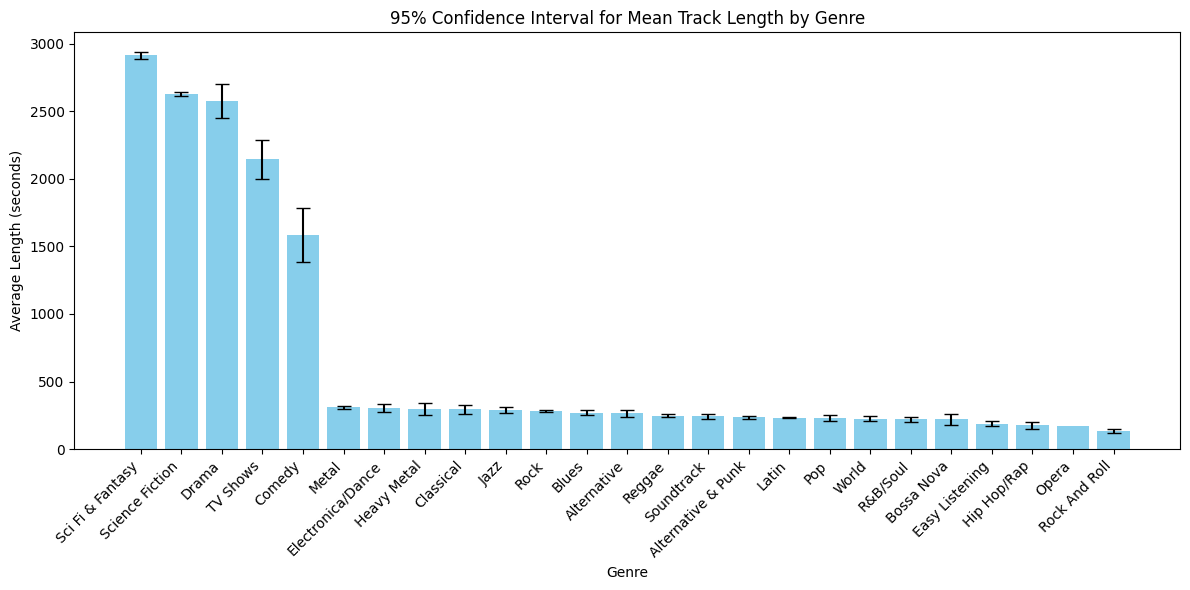

In [29]:
track_genre_df = pd.merge(track_df, genre_df, on='GenreId')

# Calculate mean track length and 95% confidence interval for each genre
genre_stats = track_genre_df.groupby('Name_y')['Milliseconds'].agg(['mean', 'count', 'std'])
genre_stats['ci95_low'] = genre_stats['mean'] - 1.96 * (genre_stats['std'] / genre_stats['count']**0.5)
genre_stats['ci95_high'] = genre_stats['mean'] + 1.96 * (genre_stats['std'] / genre_stats['count']**0.5)

# Convert units from milliseconds to seconds for better readability
genre_stats['mean'] = genre_stats['mean'] / 1000
genre_stats['ci95_low'] = genre_stats['ci95_low'] / 1000
genre_stats['ci95_high'] = genre_stats['ci95_high'] / 1000

# Sort by mean track length in descending order
genre_stats = genre_stats.sort_values(by='mean', ascending=False)

print(genre_stats[['mean', 'ci95_low', 'ci95_high']])

# Prepare data for ANOVA test
grouped_data = [group['Milliseconds'].values / 1000 for name, group in track_genre_df.groupby('Name_y')]
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"ANOVA test result for track lengths across different genres:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Check significance
alpha = 0.05
if p_value > alpha:
    print("The average length of songs across genres is remarkably similar.")
else:
    print("The average length of songs in different genres is not significantly the same.")


plt.figure(figsize=(12, 6))
plt.bar(genre_stats.index, genre_stats['mean'], yerr=[genre_stats['mean'] - genre_stats['ci95_low'], genre_stats['ci95_high'] - genre_stats['mean']], capsize=5, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Length (seconds)')
plt.title('95% Confidence Interval for Mean Track Length by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

8.2 ) What is the average sales in different countries? (95% confidence interval for mean sales per 
Calculate the country)

                    mean  ci95_low  ci95_high
Country                                      
Argentina       0.990000  0.990000   0.990000
Australia       0.990000  0.990000   0.990000
Austria         1.121579  1.012657   1.230500
Belgium         0.990000  0.990000   0.990000
Brazil          1.000526  0.985976   1.015076
Canada          0.999868  0.988738   1.010999
Chile           1.226842  1.089851   1.363833
Czech Republic  1.187368  1.097290   1.277447
Denmark         0.990000  0.990000   0.990000
Finland         1.095263  0.996376   1.194151
France          1.026842  0.999986   1.053698
Germany         1.029474  0.998415   1.060532
Hungary         1.200526  1.069162   1.331891
India           1.017027  0.979827   1.054227
Ireland         1.200526  1.069162   1.331891
Italy           0.990000  0.990000   0.990000
Netherlands     1.068947  0.982058   1.155837
Norway          1.042632  0.970680   1.114583
Poland          0.990000  0.990000   0.990000
Portugal        1.016316  0.980088

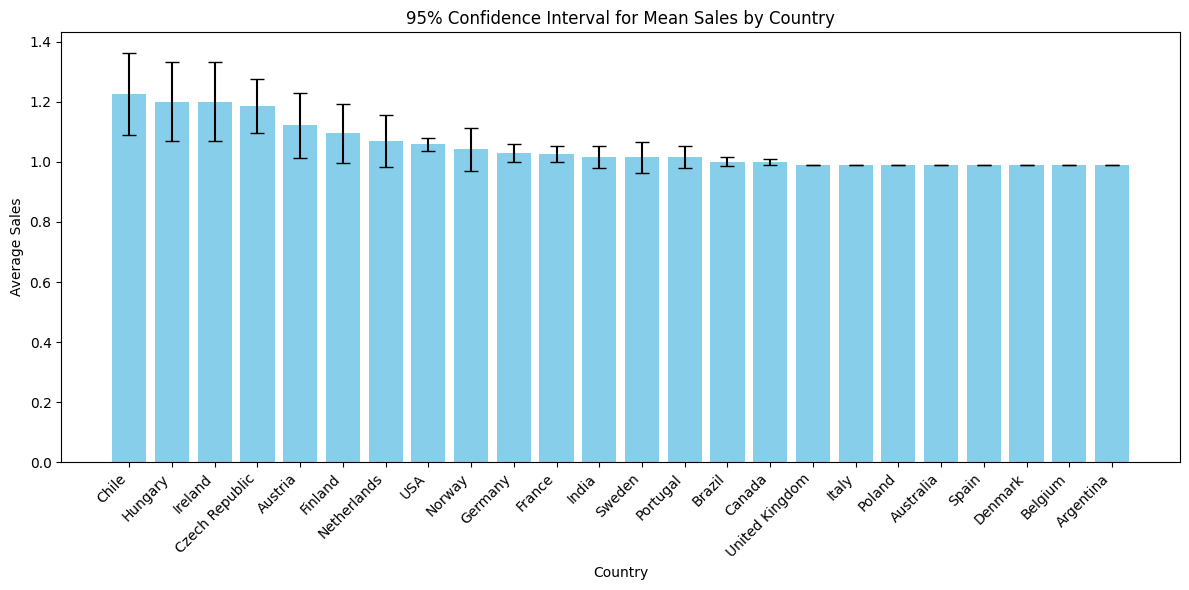

In [31]:
invoice_customer_df = pd.merge(invoice_df, customer_df, on='CustomerId')
sales_data = pd.merge(invoice_customer_df, invoiceline_df, on='InvoiceId')

# Calculate total sales for each invoice
sales_data['TotalSales'] = sales_data['UnitPrice'] * sales_data['Quantity']

# Calculate the mean sales and 95% confidence interval for each country
country_stats = sales_data.groupby('Country')['TotalSales'].agg(['mean', 'count', 'std'])
country_stats['ci95_low'] = country_stats['mean'] - 1.96 * (country_stats['std'] / np.sqrt(country_stats['count']))
country_stats['ci95_high'] = country_stats['mean'] + 1.96 * (country_stats['std'] / np.sqrt(country_stats['count']))
print(country_stats[['mean', 'ci95_low', 'ci95_high']])

# Sort by mean sales in descending order
country_stats = country_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(country_stats.index, country_stats['mean'], yerr=[country_stats['mean'] - country_stats['ci95_low'], country_stats['ci95_high'] - country_stats['mean']], capsize=5, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Sales')
plt.title('95% Confidence Interval for Mean Sales by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

8.3 ) What is the average number of songs purchased by each user? (95% confidence interval for
Calculate the average number of songs purchased by each user)

Mean number of songs purchased per invoice for each customer:
CustomerId
1     48.285714
2     48.285714
3     48.285714
4     48.285714
5     48.285714
6     48.285714
7     48.285714
8     48.285714
9     48.285714
10    48.285714
11    48.285714
12    48.285714
13    48.285714
14    48.285714
15    48.285714
16    48.285714
17    48.285714
18    48.285714
19    48.285714
20    48.285714
21    48.285714
22    48.285714
23    48.285714
24    48.285714
25    48.285714
26    48.285714
27    48.285714
28    48.285714
29    48.285714
30    48.285714
31    48.285714
32    48.285714
33    48.285714
34    48.285714
35    48.285714
36    48.285714
37    48.285714
38    48.285714
39    48.285714
40    48.285714
41    48.285714
42    48.285714
43    48.285714
44    48.285714
45    48.285714
46    48.285714
47    48.285714
48    48.285714
49    48.285714
50    48.285714
51    48.285714
52    48.285714
53    48.285714
54    48.285714
55    48.285714
56    48.285714
57    48.285714
58    48.285714

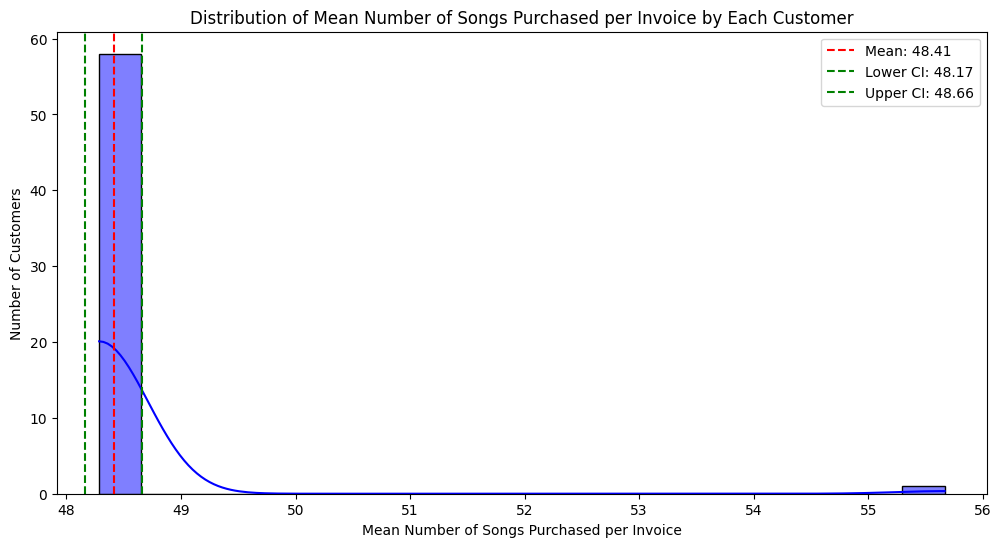

In [51]:
invoice_lines = invoiceline_df.merge(invoice_df, on='InvoiceId')

# Count the number of tracks for each invoice
invoice_lines['TrackCount'] = invoice_lines.groupby('InvoiceId')['TrackId'].transform('count')

#the number of invoices for each customer
invoice_count_per_customer = invoice_lines.groupby('CustomerId')['InvoiceId'].nunique()

#the total number of tracks purchased by each customer
total_songs_per_customer = invoice_lines.groupby('CustomerId')['TrackCount'].sum()

#the mean number of tracks purchased per invoice for each customer
mean_tracks_per_invoice = total_songs_per_customer / invoice_count_per_customer

# the mean, standard deviation, and sample size
mean_tracks = mean_tracks_per_invoice.mean()
std_dev = mean_tracks_per_invoice.std()
n = mean_tracks_per_invoice.count()

#95% confidence interval
confidence = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
margin_of_error = z_score * (std_dev / np.sqrt(n))
confidence_interval = (mean_tracks - margin_of_error, mean_tracks + margin_of_error)

print("Mean number of songs purchased per invoice for each customer:")
print(mean_tracks_per_invoice)

print("\n95% Confidence Interval for the Mean Number of Songs Purchased per Invoice:")
print(confidence_interval)

plt.figure(figsize=(12, 6))
sns.histplot(mean_tracks_per_invoice, kde=True, color='blue', bins=20)
plt.axvline(mean_tracks, color='red', linestyle='--', label=f'Mean: {mean_tracks:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'Lower CI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'Upper CI: {confidence_interval[1]:.2f}')
plt.title('Distribution of Mean Number of Songs Purchased per Invoice by Each Customer')
plt.xlabel('Mean Number of Songs Purchased per Invoice')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()